In [1]:
!pwd
!ls /mnt/promec-data/notebooks/MURA-v1.1
#!ls /mnt/promec-data/notebooks/MURA-v1.1/train/*/*/*/*.png

/mnt/promec-data/notebooks
train		       train_labeled_studies.csv  valid_image_paths.csv
train_image_paths.csv  valid			  valid_labeled_studies.csv


In [2]:
from pathlib import Path
pathmura = Path('/mnt/promec-data/notebooks/MURA-v1.1')

In [3]:
trainlist=list(pathmura.glob('train/XR_SHOULDER/*/*/*.png'))

In [35]:
trainlistclip=trainlist[0:99]
len(trainlistclip)

99

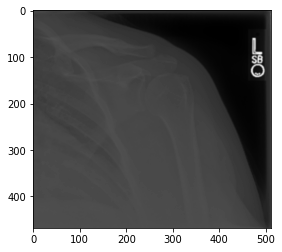

In [45]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(str(trainlistclip[1]),0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [41]:
import pandas as pd
pd.read_csv((pathmura /'train_image_paths.csv')).head(5)

,MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...


In [12]:
import random
import torch
torch.set_default_tensor_type(torch.cuda.FloatTensor)
N=5
scale=10
D_in, H, D_out = N*scale*scale, N*scale*scale, N*scale

class DynamicNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(DynamicNet, self).__init__()
        self.input_linear = torch.nn.Linear(D_in, H)
        self.middle_linear = torch.nn.Linear(H, H)
        self.output_linear = torch.nn.Linear(H, D_out)
    def forward(self, x):
        h_relu = self.input_linear(x).clamp(min=0)
        for _ in range(random.randint(0, int(N/scale))):
            h_relu = self.middle_linear(h_relu).clamp(min=0)
        y_pred = self.output_linear(h_relu)
        return y_pred

x = torch.randn(N, D_in).cuda()
y = torch.randn(N, D_out).cuda()

model = DynamicNet(D_in, H, D_out).cuda()
criterion = torch.nn.MSELoss(reduction='sum').cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)

for t in range(H):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    print(t, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    

0 268.2054443359375
1 249.2822265625
2 216.98880004882812
3 178.0712890625
4 138.46934509277344
5 102.3250961303711
6 71.95303344726562
7 49.0667724609375
8 34.374725341796875
9 27.18994140625
10 25.471538543701172
11 26.309167861938477
12 26.838186264038086
13 25.60868263244629
14 22.56279945373535
15 18.754634857177734
16 15.374798774719238
17 13.098860740661621
18 12.018614768981934
19 11.801742553710938
20 11.963985443115234
21 12.05952262878418
22 11.809654235839844
23 11.073331832885742
24 9.859655380249023
25 8.290274620056152
26 6.561008930206299
27 4.910613059997559
28 3.567502975463867
29 2.6995949745178223
30 2.369462490081787
31 2.506934642791748
32 2.925344228744507
33 3.3786704540252686
34 3.6412887573242188
35 3.580151319503784
36 3.1887943744659424
37 2.5641422271728516
38 1.8647180795669556
39 1.2434489727020264
40 0.8035155534744263
41 0.5797255039215088
42 0.5449361801147461
43 0.6346837282180786
44 0.7720900177955627
45 0.8906323909759521
46 0.9469959735870361
47 0.

In [26]:
outvec=[1 if 'positive' in i.parts[-2] else 0 for i in trainlist]
outvec

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,


In [27]:
outvecclip=outvec[0:99]

In [10]:
(outvecclip)

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0]

In [28]:
imgs = [cv2.resize(cv2.imread(str(trainlistelen),0),(320, 320)) for trainlistelen in trainlistclip] 

In [29]:
len(imgs)

99

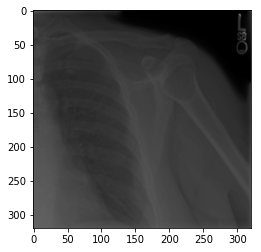

In [30]:
x=imgs[0]
#x=cv2.resize(x, (320, 320))
x=(x-np.mean(x))/np.std(x)
plt.imshow(x, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [31]:
import torch
#x = torch.randn(N, D_in).cuda()
#y = torch.randn(N, D_out).cuda()
torch.set_default_tensor_type(torch.cuda.FloatTensor)
y = torch.from_numpy(np.array(outvecclip)).cuda()
y.shape
len(y)

99

In [ ]:
xx = []
for i in range(len(imgs)):
    x = np.array(imgs[i])
    #x=x.flatten()
    x=(x-np.mean(x))/(np.std(x))
    xx.append(torch.from_numpy(x).cuda(0))
    print(xx)
#len(imgs)
#len(imgs[0])
#arr_dimen(imgs)
#len(x)

[tensor([[ 1.8984,  1.8481,  1.7978,  ...,  0.0364,  0.0868, -0.1145],
        [ 1.8984,  1.8984,  1.8481,  ..., -0.1145,  0.3384, -0.1145],
        [ 1.6971,  1.4958,  1.3952,  ..., -0.6681, -0.0642,  0.0868],
        ...,
        [ 2.2507,  2.0997,  2.1500,  ...,  0.5397,  0.7410,  0.8919],
        [ 2.2004,  2.2507,  2.1500,  ...,  0.5900,  0.7410,  0.9926],
        [ 2.2507,  2.2004,  2.1500,  ...,  0.6403,  0.7913,  0.9926]],
       dtype=torch.float64)]
[tensor([[ 1.8984,  1.8481,  1.7978,  ...,  0.0364,  0.0868, -0.1145],
        [ 1.8984,  1.8984,  1.8481,  ..., -0.1145,  0.3384, -0.1145],
        [ 1.6971,  1.4958,  1.3952,  ..., -0.6681, -0.0642,  0.0868],
        ...,
        [ 2.2507,  2.0997,  2.1500,  ...,  0.5397,  0.7410,  0.8919],
        [ 2.2004,  2.2507,  2.1500,  ...,  0.5900,  0.7410,  0.9926],
        [ 2.2507,  2.2004,  2.1500,  ...,  0.6403,  0.7913,  0.9926]],
       dtype=torch.float64), tensor([[ 0.9151,  0.8777,  0.8402,  ...,  1.9270,  0.8402,  0.5779],
  

In [34]:
len(xx[0])

320

In [22]:
xxx = torch.Tensor(len(xx),len(xx[0]),len(xx[0])).cuda()
torch.cat(xx, out=xxx.double())

tensor([[ 1.8984,  1.8481,  1.7978,  ...,  0.0364,  0.0868, -0.1145],
        [ 1.8984,  1.8984,  1.8481,  ..., -0.1145,  0.3384, -0.1145],
        [ 1.6971,  1.4958,  1.3952,  ..., -0.6681, -0.0642,  0.0868],
        ...,
        [ 1.3372,  1.3372,  1.3240,  ..., -0.6849,  0.0156,  0.1610],
        [ 1.3240,  1.3505,  1.3637,  ...,  0.1213,  0.2271,  0.3857],
        [ 1.3637,  1.3505,  1.3769,  ...,  0.3592,  0.7161,  0.9143]],
       dtype=torch.float64)

In [23]:
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):

        super(LinearRegressionModel, self).__init__() 
        # Calling Super Class's constructor
        self.linear = nn.Linear(input_dim, output_dim)
        # nn.linear is defined in nn.Module

    def forward(self, x):
        # Here the forward pass is simply a linear function

        out = self.linear(x)
        return out

input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim,output_dim)

criterion = nn.MSELoss()# Mean Squared Loss
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) #Stochastic Gradient Descent

epochs = 2000
for epoch in range(epochs):

    epoch +=1
    #increase the number of epochs by 1 every time
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_correct))

    #clear grads as discussed in prev post
    optimiser.zero_grad()
    #forward to get predicted values
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data[0]))
    

NameError: name 'nn' is not defined

In [ ]:
class DynamicNet2(torch.nn.Module):
    def __init__(self, x,y,2):
        super(DynamicNet2, self).__init__()
        self.input_linear = torch.nn.Linear(len(x), H)
        self.middle_linear = torch.nn.Linear(H, H)
        self.output_linear = torch.nn.Linear(H, len(y))
    def forward(self, x):
        h_relu = self.input_linear(x).clamp(min=0)
        for _ in range(random.randint(0, int(H))):
            h_relu = self.middle_linear(h_relu).clamp(min=0)
        y_pred = self.output_linear(h_relu)
        return y_pred

In [ ]:
model = DynamicNet2(xxx, 2, y).cuda()
criterion = torch.nn.MSELoss(reduction='sum').cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)
yp = model(xxx)
yp

In [ ]:
for t in range(1):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    print(t, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
print(x.device)
print(y.device)
print(y_pred.device)

In [2]:
#check with https://github.com/animesh/ann/blob/master/ann/Program.cs
#Iteration = 1   Error = 0.298371108760003       Outputs = 0.751365069552316     0.772928465321463
#Iteration = 2   Error = 0.291027773693599       Outputs = 0.742088111190782     0.775284968294459
inp=[0.05,0.10]
inpw=[[0.15,0.20],[0.25,0.3]]
hidden=2
hidw=[[0.4,0.45],[0.5,0.55]]
outputc=2
outputr=[0.01,0.99]
bias=[0.35,0.6]
cons=[1,1]
lr=0.5
error=1
itr=1000

In [5]:
#https://github.com/jcjohnson/pytorch-examples/blob/master/README.md  numpy
import numpy as np
x=np.asarray(inp)
y=np.asarray(outputr)
b=np.asarray(bias)
w1=np.asarray(inpw)
w2=np.asarray(hidw)
print(x,y,b,w1,w2)

[0.05 0.1 ] [0.01 0.99] [0.35 0.6 ] [[0.15 0.2 ]
 [0.25 0.3 ]] [[0.4  0.45]
 [0.5  0.55]]


In [6]:
h=1/(1+np.exp(-(x.dot(w1.T)+b[0])))
y_pred=1/(1+np.exp(-(h.dot(w2.T)+b[1])))
print(h,y_pred)

[0.59326999 0.59688438] [0.75136507 0.77292847]


In [7]:
loss = 0.5*np.square(y_pred - y).sum()
print(loss)

0.2983711087600027


In [8]:
w3=w2.T-lr*(y_pred - y)*(1-y_pred)*y_pred*h
w3

array([[0.35891648, 0.51137012],
       [0.40891648, 0.56137012]])

In [ ]:
w3p=[[0.35891647971788465, 0.5113012702387375],
       [0.4086661860762334, 0.5613701211079891]]
print(w3p-w3)

In [ ]:
w4=w1-lr*sum(((y_pred - y)*(1-y_pred)*y_pred*w2.T).T)*h*(1-h)*x

In [ ]:
  Weight: 0.35891647971788465
  Weight: 0.4086661860762334
  Bias: 0.6
 Neuron 1
  Weight: 0.5113012702387375
  Weight: 0.5613701211079891
print((w1-w4)/lr)

In [ ]:
h1=1/(1+np.exp(-(x.dot(w4)+b[0])))
y_pred_h1=1/(1+np.exp(-(h1.dot(w3)+b[1])))
print(h1,y_pred_h1)

In [ ]:
loss = 0.5*np.square(y_pred_h1 - y).sum()
print(loss)

In [ ]:
print(y_pred_h1,y_pred,y)

In [ ]:
import torch
torch.cuda.set_device(0)

In [3]:
#try same with torch
import torch
x=torch.tensor([inp], dtype=torch.float64)
y=torch.tensor([outputr], dtype=torch.float64)
b=torch.tensor(bias, dtype=torch.float64)
w1=torch.tensor(inpw, dtype=torch.float64)
w2=torch.tensor(hidw, dtype=torch.float64)
print(x,y,b,w1,w2)

tensor([[0.0500, 0.1000]], dtype=torch.float64) tensor([[0.0100, 0.9900]], dtype=torch.float64) tensor([0.3500, 0.6000], dtype=torch.float64) tensor([[0.1500, 0.2000],
        [0.2500, 0.3000]], dtype=torch.float64) tensor([[0.4000, 0.4500],
        [0.5000, 0.5500]], dtype=torch.float64)


In [4]:
print(torch.tensor(inpw).transpose(0,1),
torch.tensor(hidw).transpose(0,1))

tensor([[0.1500, 0.2500],
        [0.2000, 0.3000]]) tensor([[0.4000, 0.5000],
        [0.4500, 0.5500]])


In [5]:
h = torch.sigmoid(x.mm(w1.transpose(0,1))+b[0])
y_pred = torch.sigmoid(h.mm(w2.transpose(0,1))+b[1])
loss = 0.5*(((y_pred - y).pow(2)).sum())
print(h,y_pred,loss)

tensor([[0.5933, 0.5969]], dtype=torch.float64) tensor([[0.7514, 0.7729]], dtype=torch.float64) tensor(0.2984, dtype=torch.float64)


In [6]:
torch.tensor(w3p, dtype=torch.float64)-w2.transpose(0,1)-lr*(y_pred - y)*(1-y_pred)*y_pred*h

NameError: name 'w3p' is not defined

In [ ]:
def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

net = torch.nn.Sequential(torch.nn.Linear(2, 2), torch.nn.Linear(2, 2))
net.apply(init_weights)

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden) 
        self.predict = torch.nn.Linear(n_hidden, n_output)
    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))
        x = self.predict(x)
        return x

In [ ]:
#print(x.view)
#net = Net(n_feature=1, n_hidden=10, n_output=1)  
net=Net(outputc,outputc,outputc)
print(net)  # net architecture

In [ ]:
optimizer = torch.optim.SGD(net.parameters(), lr)
loss_func = torch.nn.MSELoss()

In [ ]:
prediction = net(x)
loss = loss_func(prediction, y)
optimizer.zero_grad()
loss.backward()
optimizer.step()
print(x.data.numpy(), y.data.numpy())
print(x.data.numpy(), prediction.data.numpy())
print(loss.data.numpy())

In [ ]:
#https://github.com/mdai/ml-lessons/blob/master/lesson3-rsna-pneumonia-detection-kaggle.ipynb
#!pwd
#!pip install --upgrade pip
!pip install kaggle
import matplotlib.pyplot as plt

In [ ]:
!ls /home/notebook/.local/bin

In [ ]:
#!/home/notebook/.local/bin/kaggle competitions download -c rsna-pneumonia-detection-challenge
#https://www.kaggle.com/c/human-protein-atlas-image-classification/data
!/home/notebook/.local/bin/kaggle competitions download -c human-protein-atlas-image-classification

In [ ]:
!ls /home/notebook/.kaggle/competitions/rsna-pneumonia-detection-challenge

In [ ]:
!unzip /home/notebook/.kaggle/competitions/rsna-pneumonia-detection-challenge/stage_1_train_images.zip
!mv *.dcm Train

In [ ]:
!pip3 install -q pydicom 
!pip3 install -q tqdm 
!pip3 install -q imgaug

In [ ]:
import os
import pydicom
import glob
train_dicom_dir = os.path.join(os.getcwd(), 'Train')
image_fps = glob.glob(train_dicom_dir+'/'+'*.dcm')
ds = pydicom.read_file(image_fps[2]) # read dicom image from filepath 
image = ds.pixel_array # get image array
ds

In [ ]:
#plt.imshow(image)
plt.imshow(image, cmap='gray')

In [ ]:
import argparse
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(args, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))



In [ ]:
parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
parser.add_argument('--batch-size', type=int, default=64, metavar='N',
help='input batch size for training (default: 64)')
parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
help='input batch size for testing (default: 1000)')
parser.add_argument('--epochs', type=int, default=10, metavar='N',
help='number of epochs to train (default: 10)')
parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
help='learning rate (default: 0.01)')
parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
help='SGD momentum (default: 0.5)')
parser.add_argument('--no-cuda', action='store_true', default=False,
help='disables CUDA training')
parser.add_argument('--seed', type=int, default=1, metavar='S',
help='random seed (default: 1)')
parser.add_argument('--log-interval', type=int, default=10, metavar='N',
help='how many batches to wait before logging training status')
args = parser.parse_args()
use_cuda = not args.no_cuda and torch.cuda.is_available()

torch.manual_seed(args.seed)

train_loader = torch.utils.data.DataLoader(
datasets.MNIST('../data', train=True, download=True,
   transform=transforms.Compose([
   transforms.ToTensor(),
   transforms.Normalize((0.1307,), (0.3081,))
   ])),
batch_size=args.batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
datasets.MNIST('../data', train=False, transform=transforms.Compose([
   transforms.ToTensor(),
   transforms.Normalize((0.1307,), (0.3081,))
   ])),
batch_size=args.test_batch_size, shuffle=True, **kwargs)


model = Net()
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

In [ ]:

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

In [ ]:


#train_mask[ds.PatientID]
train_mask[train_mask['patientId']==ds.PatientID]

In [ ]:
#!pip install autokeras
#https://github.com/google/dopamine
#!pip install cmake
!pip install atari_py
#!pip install --upgrade --no-cache-dir dopamine-rl

In [ ]:
import numpy as np
import os
from dopamine.agents.dqn import dqn_agent
from dopamine.atari import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags
BASE_PATH = '/tmp/colab_dope_run'  # @param
GAME = 'Asterix'  # @param

In [ ]:
from keras.datasets import mnist
from autokeras.classifier import ImageClassifier

if __name__ == '__main__':
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(x_train.shape + (1,))
    x_test = x_test.reshape(x_test.shape + (1,))

    clf = ImageClassifier(verbose=True, augment=False)
    clf.fit(x_train, y_train, time_limit=12 * 60 * 60)
    clf.final_fit(x_train, y_train, x_test, y_test, retrain=True)
    y = clf.evaluate(x_test, y_test)
    print(y * 100)

In [ ]:
from torch.utils import data
class rsnaDataset(data.Dataset):
    def __init__(self, root_path, file_list):
        self.root_path = root_path
        self.file_list = file_list
    def __len__(self):
        return len(self.file_list)
    def __getitem__(self, index):
        if index not in range(0, len(self.file_list)):
            return self.__getitem__(np.random.randint(0, self.__len__()))
        file_id = self.file_list[index]
        image_folder = os.path.join(self.root_path, "images")
        image_path = os.path.join(image_folder, file_id + ".dcm")
        #label folder + path
        mask_folder = os.path.join(self.root_path, "masks")
        mask_path = os.path.join(mask_folder, file_id + ".dcm")
        #read it, store it in memory as a byte array
        image = np.array(imageio.imread(image_path), dtype=np.uint8)
        mask = np.array(imageio.imread(mask_path), dtype=np.uint8)
        #return image + label
        return image, mask

In [ ]:
#train image + mask data
import pandas as pd
!chmod 644 stage_1_train_labels.csv
train_mask = pd.read_csv('stage_1_train_labels.csv')
file_list = list(train_mask['patientId'].values)
file_list

In [ ]:
dataset = rsnaDataset(train_dicom_dir, file_list)
dataset

In [ ]:
#https://ieee-dataport.org/open-access/indian-diabetic-retinopathy-image-dataset-idrid
!ls retina/*A*/*O*/*Train*
import os
from glob import glob
imgs = glob(os.path.join('retina/*A*/*O*/*Train*', "*.jpg"))
imgs[2]

In [ ]:
import cv2
import matplotlib.pylab as plt
cvimg = cv2.imread(imgs[2],1)
plt.imshow(cvimg)

In [ ]:
#https://github.com/fastai/fastai/blob/master/courses/dl2/carvana-unet-lrg.ipynb
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from fastai.conv_learner import *
from fastai.dataset import *
from fastai.models.resnet import vgg_resnet50
import json
def show_img(im, figsize=None, ax=None, alpha=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, alpha=alpha)
    ax.set_axis_off()
    return ax
PATH = Path('retina/*B*/*G*')
MASKS = '*Training*.csv'
META = '*metadata*.csv'
masks_csv = pd.read_csv(PATH/MASKS)
#meta_csv = pd.read_csv("retina/*/*/META")

In [ ]:
def plot_ds_img(idx, ax=None, figsize=(7,7), normed=True):
    if ax is None: fig,ax = plt.subplots(figsize=figsize)
    im = md.val_ds[idx][0]
    if normed: im = denorm(im)[0]
    else:      im = np.rollaxis(to_np(im),0,3)
    ax.imshow(im)
    ax.axis('off')

In [ ]:
md = ImageData(PATH, imgs[1:7], 6, num_workers=16, classes=None)

In [ ]:
fig,axes=plt.subplots(6,6,figsize=(20,20))
for i,ax in enumerate(axes.flat): plot_ds_img(imgs[i],ax=ax, normed=True)

In [ ]:
!pip install lime

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
!conda install numpy zeromq pyzmq

In [ ]:
https://github.com/pytorch/ELF 

In [ ]:
!pip install torch  --upgrade

In [ ]:
#!pip install talos
#!pip install pyro-ppl 
!pip install fastai

In [ ]:
import torch
print("#GPU-", torch.cuda.device_count())

In [ ]:
from torch.utils.data import Dataset, DataLoader
ip_s = 500000
op_s = 5000
bat_s = 1000
data_s = 10000
class randDataset(Dataset):
    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)
    def __getitem__(self, index):
        return self.data[index]
    def __len__(self):
        return self.len
rand_loader = DataLoader(randDataset(ip_s, data_s), bat_s, shuffle=True)
rand_loader

In [ ]:
import torch.nn as nn
class FCN(nn.Module):
    def __init__(self, ip_s, op_s):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(ip_s, int((ip_s+op_s)/2))
        self.fc2 = nn.Linear(int((ip_s+op_s)/2), op_s)
    def forward(self, input):
        output = self.fc1(input)
        output = self.fc2(output)
        print("\tFCN: input", input.size(),"output", output.size())
        return output
two_layer_nn = FCN(ip_s, op_s).cuda()
two_layer_nn = nn.DataParallel(two_layer_nn)
for data in rand_loader:
    input = data
    output = two_layer_nn(input)
    print("input", input.size(),"output", output.size())

In [ ]:
!pip install numpy mpi4py

In [ ]:
!pip install petsc4py

In [ ]:
!pip install problog  

In [ ]:
!pip install pyro-ppl

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
import torch.nn as nn
class FCN(nn.Module):
    def __init__(self,n,o):
        super().__init__()
        self.fc1=nn.Linear(n,int(n/2))
        self.fc2=nn.Linear(int(n/2),o)
    def forward(self,x):
        x=self.fc1(x)
        x=self.fc2(x)
        return x  

In [ ]:
from torch.utils.data import DataLoader
n=64
o=1
bs=int(n/8)
ip=(torch.randn(n).cuda())
#print("ip",ip)
rand_loader = DataLoader(ip,batch_size=bs, shuffle=False)
for data in rand_loader:
    two_layer_nn=nn.DataParallel(FCN(data.size()[0],o).cuda())
    op=two_layer_nn(data)
    print("batch",two_layer_nn)    

In [ ]:
n=64
o=4
torch.manual_seed(n)
ip = (torch.randn(n)).cuda()
two_layer_nn=nn.DataParallel(FCN(n,o).cuda()) # not working!
two_layer_nn=FCN(n,o).cuda()
op=two_layer_nn(ip)
op

In [ ]:
import torch.nn
rng=1
input1 = torch.rand(64*rng, 3*rng, 128*rng, 128*rng).cuda()
input2 = torch.Tensor(64*rng, 3*rng, 128*rng, 128*rng).uniform_(-1, 1).cuda()
input1 = torch.autograd.Variable(input1, requires_grad=True)
input2 = torch.autograd.Variable(input2, requires_grad=True)
#expected = torch.mul(input1, input2)
expected = input1 - input2
expected.mean()

In [ ]:
# imports
import torch # do not run this line after instantiating TorchClient
import torch.nn as nn
from torch.autograd import Variable
from grid.clients.torch import TorchClient
import numpy as np
import re

# instantiate client!
client = TorchClient(verbose=False)

In [ ]:
!pip install gym

In [ ]:
import  gym
env  =  gym.make()
for i_episode in xrange(20):
    observation = env.reset()
    for t in xrange(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima price dataset
dataset = datasets.load_boston()
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
import torch
print("#GPU-", torch.cuda.device_count())

# New heading

# filetered dataset via https://github.com/animesh/CheXNet fork

In [ ]:
import os
from glob import glob
imgs = glob(os.path.join('./CheXNet/ChestX-ray14/images/', "*.png"))
imgs[2]

In [ ]:
#pip install --upgrade pip
!pip install opencv-python

In [ ]:
import cv2
import matplotlib.pylab as plt
cvimg = cv2.imread(imgs[2000],1)
plt.imshow(cvimg)

In [ ]:
import numpy as np
%time Xrays256 = np.array([cv2.resize(cv2.imread(img,0), (256, 256), interpolation = cv2.INTER_AREA)/255 for img in imgs[:]])

In [ ]:
import cupy as cp
%time Xrays256 = cp.array([cv2.resize(cv2.imread(img,0), (256, 256), interpolation = cv2.INTER_AREA)/255 for img in imgs[:]])


In [ ]:
Xrays256.shape

In [ ]:
import pandas as pd
validation = pd.read_table("./CheXNet/ChestX-ray14/labels/val_list.txt.sel", sep=' ',header=None,index_col=0)
train = pd.read_table("./CheXNet/ChestX-ray14/labels/train_list.txt.sel", sep=' ',index_col=0,header=None)
test = pd.read_table("./CheXNet/ChestX-ray14/labels/test_list.txt.sel", sep=' ',index_col=0,header=None)
validation, train, test

In [ ]:
#pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia', 'No Finding']
#https://nihcc.app.box.com/v/ChestXray-NIHCC/file/220660789610
#pathology_list = [1, Atelectasis; 2, Cardiomegaly; 3, Effusion; 4, Infiltration; 5, Mass; 6, Nodule; 7, Pneumonia; 8, Pneumothorax; 9, Consolidation; 10, Edema; 11, Emphysema; 12, Fibrosis; 13, Pleural_Thickening; 14 Hernia]
pathology_list = ['Atelectasis','Cardiomegaly','Effusion','Infiltration','Mass','Nodule','Pneumonia','Pneumothorax','Consolidation','Edema','Emphysema','Fibrosis','Pleural_Thickening','Hernia']
len(pathology_list)

In [ ]:
sample_labels=validation.append([train, test],ignore_index=True)
(sample_labels)

In [ ]:
sample_labels.columns=pathology_list
sample_labels


In [ ]:
Xrays256256 = Xrays256.reshape(10000,256*256)

In [ ]:
from torch.utils.data import Dataset, DataLoader
data_loader = DataLoader(Xrays256256, 1000, shuffle=True)
data_loader

In [ ]:
import torch.nn as nn
class FCN(nn.Module):
    def __init__(self, ip_s, op_s):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(ip_s, int((ip_s+op_s)/2))
        self.fc2 = nn.Linear(int((ip_s+op_s)/2), op_s)
    def forward(self, input):
        output = self.fc1(input)
        output = self.fc2(output)
        print("\tFCN: input", input.size(),"output", output.size())
        return output

In [ ]:
two_layer_nn = FCN(65536, 14).cuda()
two_layer_nn = nn.DataParallel(two_layer_nn)
for data in data_loader:
    input = data
    output = two_layer_nn(input)
    print("input", input.size(),"data",output)
    #cvimg = cv2.imread(input[1,:,:],1)
    #plt.imshow(cvimg)

#FastAI https://github.com/fastai/fastai/blob/master/courses/dl1/lesson1.ipynb 

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!pip install fastai

In [ ]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [ ]:
torch.backends.cudnn.enabled

In [ ]:
!wget http://files.fast.ai/data/dogscats.zip

In [ ]:
!unzip dogscats.zip

In [ ]:
PATH = "dogscats/"
sz=224

In [ ]:
os.listdir(PATH)

In [ ]:
os.listdir(f'{PATH}valid')

In [ ]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files
#img = plt.imread(f'{PATH}valid/cats/{files[0]}')
#plt.imshow(img);

In [ ]:
img.shape

In [ ]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(1, 2)

In [ ]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [ ]:
lrf=learn.lr_find()

In [ ]:
learn.sched.plot_lr()

In [ ]:
learn.sched.plot()

In [ ]:
Xrays256.T

In [ ]:
pd.hist(output-sample_labels)

In [ ]:
binary_labels = sample_labels.iloc[:,-1].values.reshape(-1,1)
multiclass_labels = sample_labels.iloc[:,-14:].values

binary_labels.shape, multiclass_labels.shape

In [ ]:
binary_labels = 1-binary_labels
binary_labels

In [ ]:
import pomegranate
pomegranate.utils.enable_gpu()
print(pomegranate.utils.is_gpu_enabled())

In [ ]:
import cupy
from cupy import cuda
cuda.Device().cublas_handle
import cupy as cp
cp.cuda.Device(0).use()
x_on_gpu0 = cp.array([1, 2, 3, 4, 5])
cp.cuda.Device(1).use()
x_on_gpu1 = cp.array([1, 2, 3, 4, 5])
x_on_gpu0.device, x_on_gpu1.device
x_on_gpu0,x_on_gpu1
x_on_gpu0+x_on_gpu1

In [ ]:
%%time
import cupy
from cupy import cuda
cuda.Device().cublas_handle
import cupy as cp
cp.cuda.Device(0).use()
N=10000
x_on_gpu0 = cp.random.rand(N,N)
#x_on_gpu0
x_on_gpu0_inv=cp.linalg.inv(x_on_gpu0)
cp.dot(x_on_gpu0_inv,x_on_gpu0)==cp.eye(N)
#x_on_gpu0_inv
#np.allclose(cp.asarray(cp.dot(x_on_gpu0_inv,x_on_gpu0)),np.eye(N))


In [ ]:
%%time
import numpy as np
N=10000
x_on_gpu0 = np.random.rand(N,N)
#x_on_gpu0
x_on_gpu0_inv=np.linalg.inv(x_on_gpu0)
#np.allclose(np.dot(x_on_gpu0_inv,x_on_gpu0),np.eye(N))
np.dot(x_on_gpu0_inv,x_on_gpu0)==np.eye(N)
#x_on_gpu0_inv
#np.eye(N)

In [ ]:
np.sum(np.genfromtxt('proteinGroups.txt',delimiter='\t'))

In [ ]:
#!conda install pomegranate
!pip install cupy

In [ ]:
def birthProb(N):
    fac,div,day=1,1,354
    for i in range(N):
        fac*=(day-i)
        div*=day
        #print(day-i,fac,div)
    return 1.0-fac/div
probList=[birthProb(i) for i in list(range(100))]
import matplotlib.pyplot as plt
plt.plot(probList)
plt.axhline(0.5)
plt.axvline(22)
plt.show()

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xrays256, binary_labels, test_size = .2)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=71, shuffle=True, random_state=42)
batches = [train for test, train  in kf.split(X_train, y_train)]
batches[0].shape

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
test_batches = [t_batch for _, t_batch  in kf.split(X_test, y_test)]
np.histogram(test_batches[9])

In [ ]:
X_train.shape,X_test.shape

In [ ]:
#graph
import tensorflow as tf
tf.reset_default_graph()
X = tf.placeholder(dtype = tf.float32,
                   shape = (None, 256, 256), #remember i resized image to 128x128 grayscale using .reshape(-1,128,128,1)
                   name = 'X')

y = tf.placeholder(dtype = tf.float32,
                   shape = (None),
                   name = 'y')

# Input Layer
input_layer = tf.reshape(X, [-1, 128, 128, 1])
                                                                        
# Convolutional Layer #1
out = tf.layers.conv2d(inputs=input_layer,filters=4,
                         kernel_size=[2, 2],
                         padding="same",
                         activation=tf.nn.relu)
# Pooling Layer #1
out = tf.layers.max_pooling2d(inputs=out,
                                pool_size=[2, 2],##64 x 64, strides = 2 so our image is compressed from 128 --> 64
                                    strides=2)
# 2nd Convolutional Layer #2 and Pooling Layer #2
out = tf.layers.conv2d(inputs=out,filters=8,
                         kernel_size=[2, 2],
                         padding="same",
                         activation=tf.nn.relu)
# 2nd Pooling Layer    
out = tf.layers.max_pooling2d(inputs=out,
                                pool_size=[2, 2],#64x64 14 -- >7
                                strides=2)
# 3rd Convolutional Layer
out = tf.layers.conv2d(inputs=out,filters=8,
                         kernel_size=[2, 2],
                         padding="same",
                         activation=tf.nn.relu)
# Dense, dropout, dense Layer
out = tf.reshape(out, [-1, 64 * 64 * 8]) #FLATTEN LAYER
dense = tf.layers.dense(inputs=out, units=100, activation=tf.nn.relu) #FIRST DENSE LAYER
dropout = tf.layers.dropout(inputs=dense,
                            rate=0.2)#40% to zero DROPOUT LAYER
dense2 = tf.layers.dense(inputs=dropout, units=100, activation=tf.nn.relu) #SECOND DENSE LAYER

# Logits Layer
y_hat = tf.layers.dense(inputs=dense2, units=1, #will need to change this once I have more labels/diseases
                        activation = tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)#gives the loss 

optimizer = tf.train.AdamOptimizer(0.001)

training_op = optimizer.minimize(loss)#optimizes the loss fx with adam gradient descent

saver = tf.train.Saver()

In [ ]:
%%time
#execution phase

init = tf.global_variables_initializer()

test_err = []
train_err = []
pred = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(50): #maybe add some minibatches so it converges faster
        for count, batch in enumerate(batches):
            X_batch = X_train[batch]
            y_batch = y_train[batch]
            sess.run(training_op,
                     feed_dict={X:X_batch, y:y_batch})
            print('epoch:{0}, batch{1}'.format(epoch, count), end='\r')
            
        train_loss = sess.run(loss, feed_dict={X:X_batch, y:y_batch})
        train_err.append(train_loss)
#         test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        
#         test_err.append(test_loss)
       
        print('epoch', epoch, train_loss) #no need for the 'epoch+1', just epoch will suffice
        
    saver.save(sess,'./128Xrays.ckpt')
    
    for batch in test_batches:
        pred.append(sess.run(y_hat, feed_dict={X:X_test[batch]}))

In [ ]:
plt.plot(train_err)

In [ ]:
predictions = [result for p in pred for result in p ]
predictions

In [ ]:
from  sklearn.metrics import accuracy_score,log_loss #ytrue ypred
log_loss(y_test, [[p[0],1-p[0]] for p in predictions])

In [ ]:
np.round([p[0] for p in predictions])

In [ ]:
# Compute confusion matrix
confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0])
cnf_matrix = confusion_matrix(y_test, np.round([p[0] for p in predictions]))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Findings', 'Abnormal Findings'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Findings', 'Abnormal Findings'],
                      normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
z = np.array([[1, 2, 3, 4],
         [5, 6, 7, 8],
         [9, 10, 11, 12]])
z.shape

In [ ]:
z=z.reshape(-1,3,2)
z

In [ ]:
import matplotlib.pylab as plt
z=z.reshape(3,-1)
plt.imshow(z)

In [ ]:
X=Variable(torch.Tensor(Xrays256[:,1,1].reshape(-1,1))).cuda()
y=Variable(torch.Tensor(Xrays256[:,1,2].reshape(-1,1))).cuda()
X, y

In [ ]:
w=Variable(torch.Tensor(Xrays256[:,1,3].reshape(-1,1)), requires_grad=True).cuda()

In [ ]:
y=X@(w.transpose(0,1))

In [ ]:
y#.backward()

In [ ]:
w.grad.data.zero_()

In [ ]:
!conda install pyro

In [ ]:
import pyro
from pyro.distributions import Bernoulli, Normal  # noqa: F401
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__() 
        self.linear = nn.Linear(input_dim, output_dim,bias=True).cuda()
    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
input_dim = 1
output_dim = 1
l_rate = 0.01
model = LinearRegressionModel(input_dim,output_dim)
criterion = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate)

In [ ]:
epochs = 100
for epoch in range(epochs):
    epoch +=1
    optimiser.zero_grad()
    outputs = model.forward(X)
    loss = criterion(outputs, y)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data[0]))

In [ ]:
predicted =model.forward(X).cpu().data.numpy()
#plt.plot(X, y, 'i', label = 'from data', alpha = .5)
plt.plot(y.cpu().data.numpy(), predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(model.state_dict())